In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 37s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

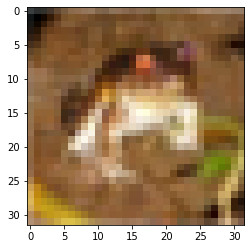

In [7]:
plt.imshow(X_train[0])

Text(0.5, 0, 'frog')

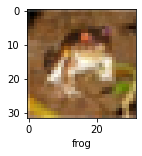

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
plt.xlabel('frog')

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
y_train[0][0]

6

In [13]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(8,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

In [16]:
y_train=y_train.reshape(-1)

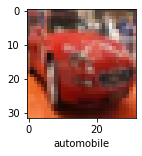

In [17]:
plot_sample(X_train,y_train,5)

In [18]:
X_train=X_train/255

In [19]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [20]:
X_test=X_test/255

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 190s 120ms/step - loss: 1.8898 - accuracy: 0.3266
Epoch 2/3
1563/1563 [==============================] - 188s 120ms/step - loss: 1.6576 - accuracy: 0.4036
Epoch 3/3
1563/1563 [==============================] - 188s 120ms/step - loss: 1.5811 - accuracy: 0.4322


In [28]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 26s 15ms/step - loss: 1.4409 - accuracy: 0.4848
Epoch 2/3
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0900 - accuracy: 0.6216
Epoch 3/3
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9615 - accuracy: 0.6663


In [30]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 4ms/step


In [32]:
y_test=y_test.reshape(-1)

In [33]:
y_pred[:5]

array([[3.18325549e-01, 3.05315293e-02, 8.83060455e-01, 9.71097767e-01,
        4.88199085e-01, 8.45487118e-01, 8.13227177e-01, 5.81942834e-02,
        7.69358695e-01, 2.44759582e-02],
       [9.63455021e-01, 9.95959044e-01, 1.59349054e-01, 8.77592247e-03,
        5.95207289e-02, 6.21678948e-04, 9.23803134e-04, 5.78803429e-03,
        9.90845621e-01, 9.31650758e-01],
       [8.04176867e-01, 9.09785390e-01, 2.90958017e-01, 2.22526431e-01,
        2.16406107e-01, 2.96912063e-02, 4.19685803e-02, 3.28592695e-02,
        9.76447880e-01, 8.61782253e-01],
       [9.78482842e-01, 7.35121906e-01, 6.46790624e-01, 1.10100076e-01,
        3.07674050e-01, 1.12994043e-02, 2.74446309e-02, 2.66207531e-02,
        9.17034447e-01, 5.99145032e-02],
       [4.23816517e-02, 9.65361595e-02, 9.60219681e-01, 9.58562672e-01,
        9.96350706e-01, 7.69652128e-01, 9.95565653e-01, 4.68523577e-02,
        7.04921111e-02, 4.04079212e-03]], dtype=float32)

In [34]:
import numpy as np

In [35]:
y_classes=[np.argmax(i) for i in y_pred]

In [36]:
y_classes

[3,
 1,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 6,
 5,
 3,
 8,
 6,
 7,
 2,
 0,
 9,
 4,
 2,
 4,
 2,
 9,
 6,
 6,
 2,
 2,
 3,
 9,
 3,
 4,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 8,
 7,
 2,
 9,
 2,
 2,
 6,
 8,
 8,
 7,
 8,
 5,
 2,
 7,
 5,
 1,
 2,
 6,
 2,
 1,
 0,
 5,
 2,
 2,
 6,
 8,
 8,
 9,
 2,
 2,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 3,
 5,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 2,
 2,
 0,
 2,
 2,
 2,
 8,
 2,
 0,
 3,
 5,
 0,
 4,
 1,
 9,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 2,
 5,
 6,
 5,
 8,
 4,
 6,
 6,
 7,
 5,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 2,
 8,
 4,
 8,
 6,
 5,
 0,
 9,
 6,
 9,
 8,
 9,
 9,
 4,
 7,
 5,
 9,
 0,
 5,
 2,
 2,
 6,
 8,
 6,
 2,
 6,
 8,
 2,
 8,
 2,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 2,
 1,
 3,
 8,
 5,
 7,
 9,
 2,
 9,
 5,
 9,
 0,
 0,
 1,
 9,
 0,
 4,
 7,
 4,
 9,
 2,
 3,
 9,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 8,
 0,
 2,
 7,
 6,
 5,
 1,
 9,
 1,
 9,
 0,
 2,
 1,
 8,
 2,
 0,
